In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import seaborn as sns


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


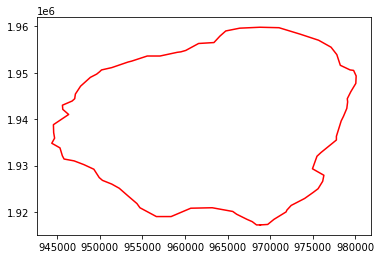

In [2]:
# Read in (initial) grounding line

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.plot(hull_pts[0], hull_pts[1], color='red')   


In [3]:
# Make polygon for grounding line

poly = Polygon(zip(list(hull_pts[0]), list(hull_pts[1])))


In [10]:
# Read in data and store relevant data

Data = {'Time': [],  'dsdtmean': [], 'dsdtstddev':[], 'upper':[]}

for i in range(0, 45):
    Data['Time'].append(i*5)
    data = pd.read_csv('/Users/clara.henry/Documents/Derwael/Data/dsdtData/dsdtBMB085/dsdstBMB085_' + str(i) + '.csv')
    for j in range(len(data)):
        boolean = poly.contains(Point(data['Points:0'][j], data['Points:1'][j]))
        if boolean == False:
            data['dsdt'][j] = np.nan
    Data['dsdtmean'].append(data['dsdt'].mean())
    Data['dsdtstddev'].append(data['dsdt'].std())



/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_14660/3144862825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dsdt'][j] = np.nan
/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_14660/3144862825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dsdt'][j] = np.nan
/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_14660/3144862825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_14660/3144862825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dsdt'][j] = np.nan
/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_14660/3144862825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dsdt'][j] = np.nan
/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_14660/3144862825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da

In [15]:

for i in range(len(Data['dsdtmean'])):
    Data['upper'].append(Data['dsdtmean'][i] + Data['dsdtstddev'][i])
            


In [16]:
Data['upper']



[0.8817325518368585,
 0.7003155375682838,
 0.5763104334431068,
 0.5050922315409943,
 0.8817325518368585,
 0.7003155375682838,
 0.5763104334431068,
 0.5050922315409943,
 0.46264020384923515,
 0.4106763065782832,
 0.3788590274740663,
 0.35643812291176846,
 0.35386498694795954,
 0.3242043246497275,
 0.3103737230142828,
 0.295720184893286,
 0.284227944365506,
 0.2729556394944563,
 0.2640797715432527,
 0.2532235115686689,
 0.2462934866486659,
 0.239097123128656,
 0.23452307008694318,
 0.2497560779935027,
 0.23083758109810404,
 0.22819480180501717,
 0.22489544753438828,
 0.21726647582280176,
 0.21124426562081433,
 0.2067993214909486,
 0.2012892879540623,
 0.19654100655256762,
 0.1927764219290422,
 0.18911599158425912,
 0.18508880588807175,
 0.18347572906135595,
 0.18155174980903926,
 0.17795367680549565,
 0.17417829697240123,
 0.17012222907011437,
 0.16556611958742115,
 0.16228719863295238,
 0.15800206602037792,
 0.15480611799119653,
 0.15069656708934073,
 0.1490280710293413,
 0.144191414594

In [13]:
Data

{'Time': [0,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195,
  200,
  205,
  210,
  215,
  220],
 'dsdtmean': [0.10343061046673406,
  0.1238640188150768,
  0.13301057598122734,
  0.13015400954984835,
  0.12013271185252504,
  0.12353678313073362,
  0.11984194357024448,
  0.1193258148160129,
  0.11838437124292653,
  0.11611672570695246,
  0.11270484773282127,
  0.11065934179352907,
  0.1069860510161809,
  0.10492388661995157,
  0.10386908421196182,
  0.10052565736486783,
  0.0994152623901255,
  0.09756755414486734,
  0.0961929014831005,
  0.0959128937392448,
  0.09005597336460368,
  0.08640220791449371,
  0.08177813628262612,
  0.0819186406430017,
  0.0821958580733631,
  0.08305386024823129,
  0.08237573334471597,
  0.08162437831089564,
  0.08072519764944439,
  0.07974240491890797,
  0.